<a href="https://colab.research.google.com/github/Kalmar41k/internet-service-churn-prediction/blob/Olha_Ya/Olha_Ya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Завантаження необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Завантаження файлу

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


Розпакування ZIP-архіву

In [3]:
import zipfile
import os

zip_path = "archive.zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Файли розпаковані в:", extract_path)


Файли розпаковані в: /content/data


Перегляд вмісту розпакованої папки

In [4]:
os.listdir(extract_path)


['internet_service_churn.csv']

In [5]:
df = pd.read_csv(next(iter(uploaded)))

In [6]:
# Перегляд перших рядків
print("Перші 5 рядків датасету:")
display(df.head())

Перші 5 рядків датасету:


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [7]:
# Загальна інформація про набір даних
print("\nІнформація про датасет:")
df.info()


Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [8]:
# Опис статистичних характеристик
print("\nОпис статистичних характеристик:")
display(df.describe())


Опис статистичних характеристик:


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [9]:
# Перевірка на пропущені значення
print("\nКількість пропущених значень у кожному стовпці:")
display(df.isnull().sum())


Кількість пропущених значень у кожному стовпці:


,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


In [14]:
# Візуалізація розподілів числових змінних
num_columns = df.select_dtypes(include=['number']).columns

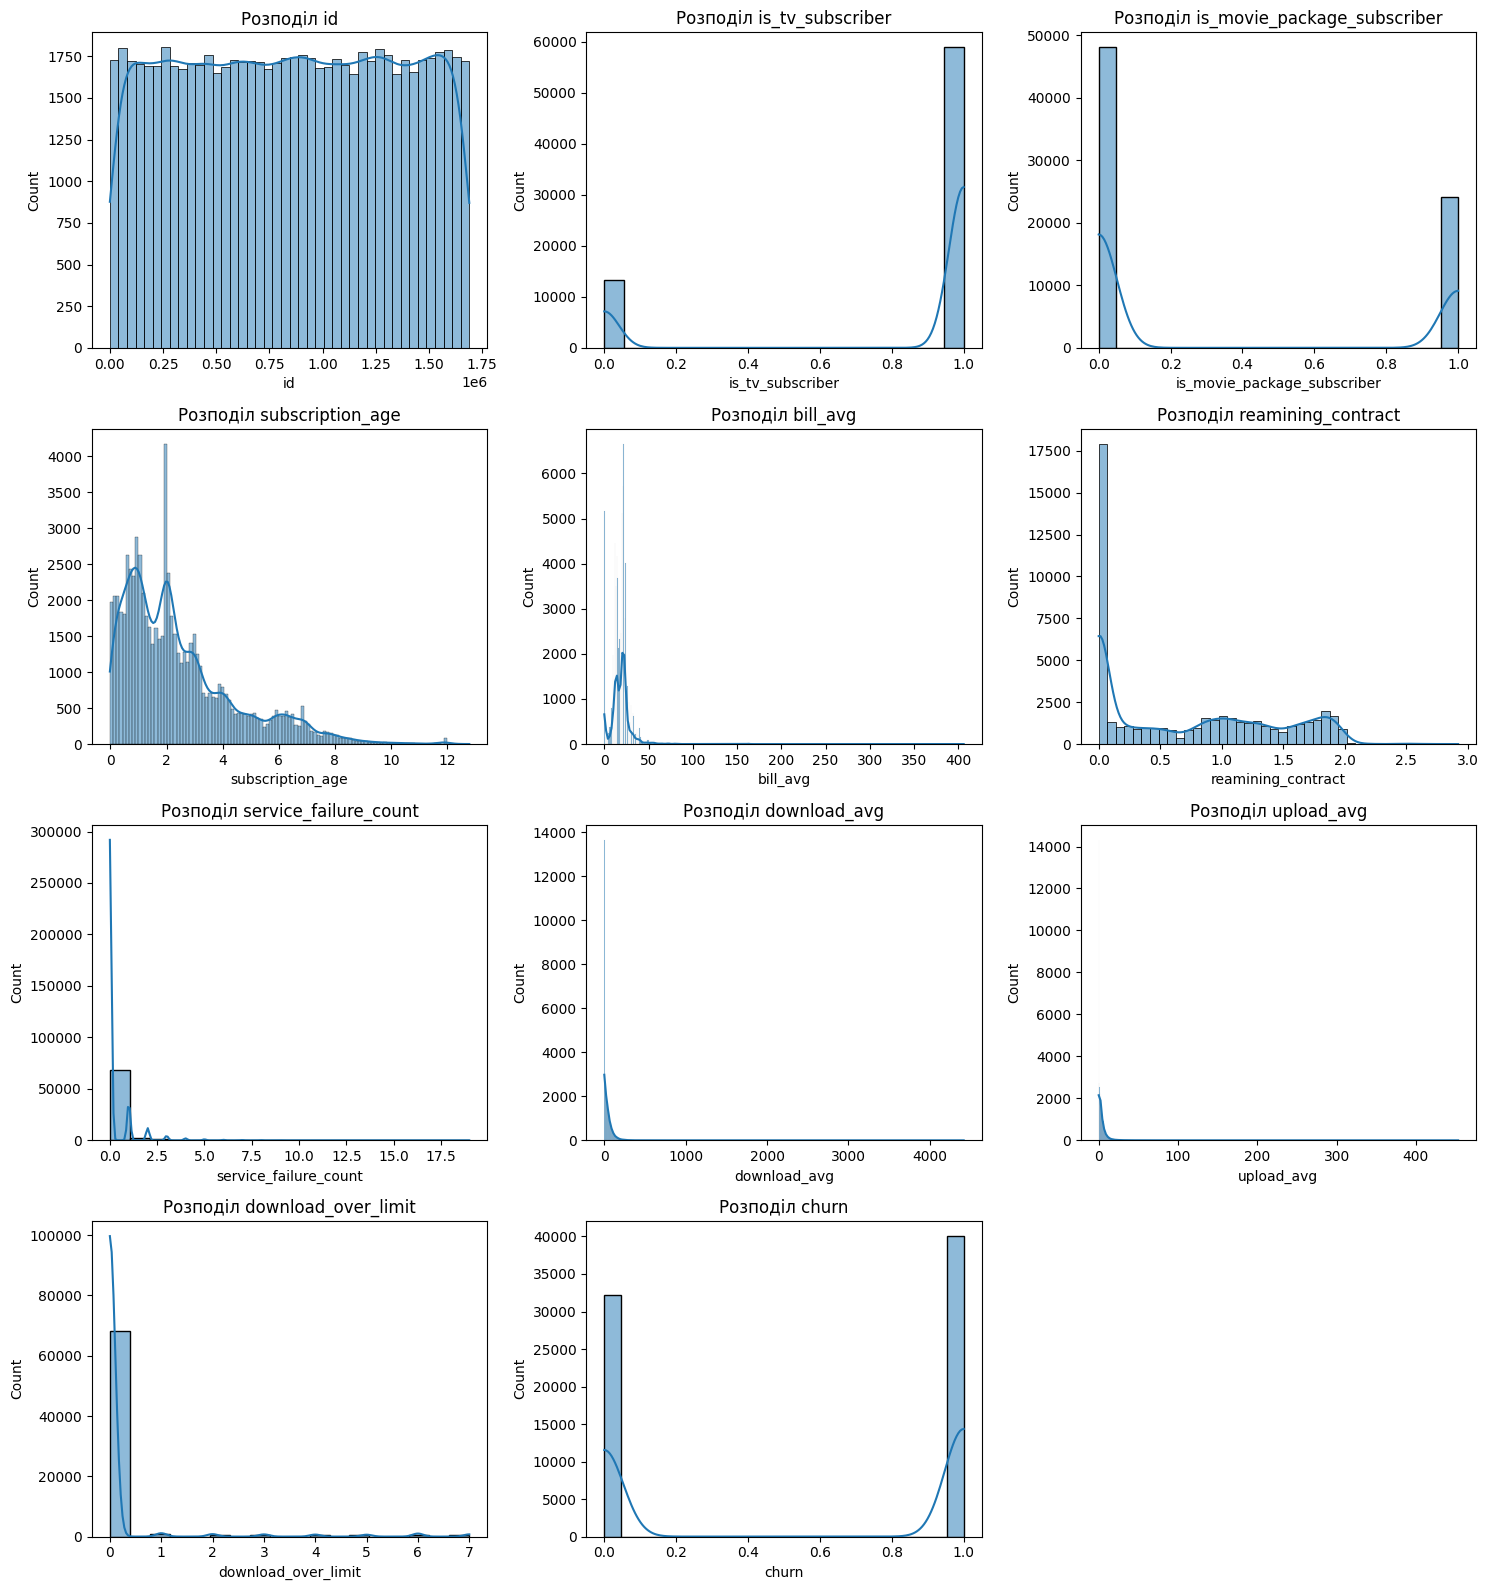

In [15]:
import math

# Кількість числових колонок
num_features = len(num_columns)

# Визначаємо кількість рядків і стовпців для підграфіків
rows = math.ceil(num_features / 3)  # Динамічно визначаємо кількість рядків
cols = min(3, num_features)  # Не більше 3 стовпців

plt.figure(figsize=(cols * 5, rows * 4))  # Динамічний розмір фігури

for i, col in enumerate(num_columns, 1):
    plt.subplot(rows, cols, i)  # Автоматично підлаштовуємо розмір
    sns.histplot(df[col], kde=True)
    plt.title(f'Розподіл {col}')

plt.tight_layout()
plt.show()


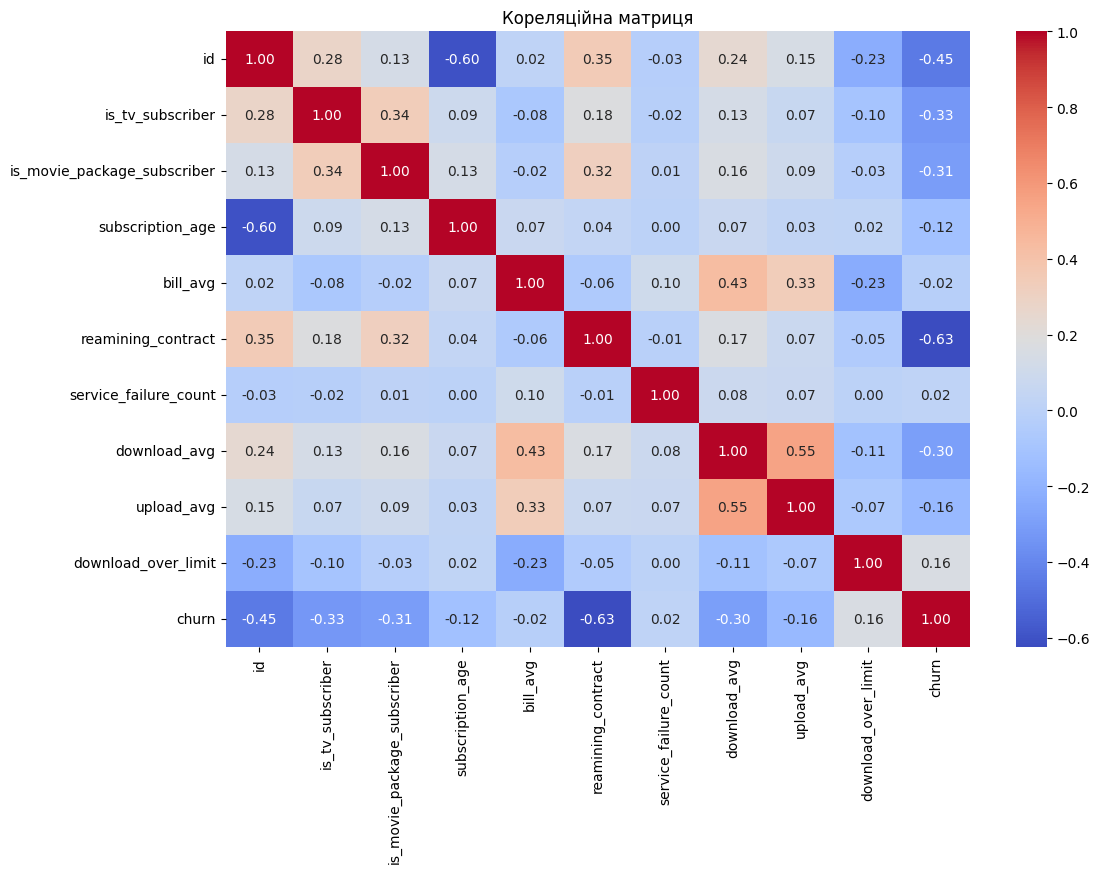

In [16]:
# Кореляційна матриця
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Кореляційна матриця")
plt.show()

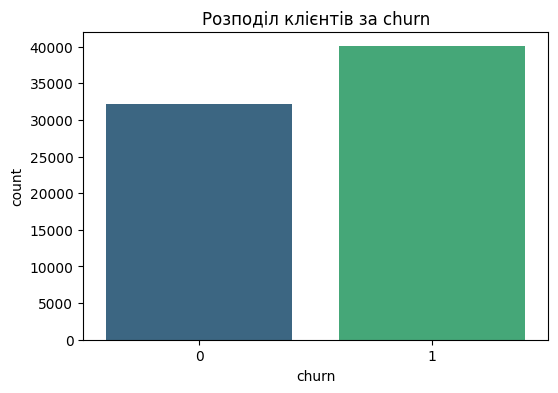

In [19]:
# Розподіл цільової змінної (churn)
if 'churn' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['churn'], hue=df['churn'], palette='viridis', legend=False)
    plt.title('Розподіл клієнтів за churn')
    plt.show()
else:
    print("\nКолонка 'churn' не знайдена в датасеті.")